In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [47]:
df = pd.read_csv("C:\Abhinav\Test\Datasets\AML\Program_4_Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\abhin\AppData\Local\Temp\ipykernel_13696\2503727125.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Abhinav\Test\Datasets\AML\Program_4_Dataset.csv")


In [48]:
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [49]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [50]:
x = df['Temperature']
y = df['Pressure']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=14)

In [52]:
X_train_reshaped = x_train.values.reshape(-1, 1)  # Reshape to 2D
X_test_reshaped = x_test.values.reshape(-1, 1)    # Reshape to 2D
lin_model = LinearRegression()
lin_model.fit(X_train_reshaped, y_train)
y_linear_pred = lin_model.predict(X_test_reshaped)

In [53]:
lin_r2 = r2_score(y_test, y_linear_pred)
lin_mse = mean_squared_error(y_test, y_linear_pred)
lin_mae = mean_absolute_error(y_test, y_linear_pred)

print("Linear Regression Results:")
print("R-Sqaured: ", lin_r2)
print("mean Squared Error: ", lin_mse)
print("Mean Absolute Error: ", lin_mae)

Linear Regression Results:
R-Sqaured:  0.5428574097217505
mean Squared Error:  32.209524072897416
Mean Absolute Error:  4.671744947756833


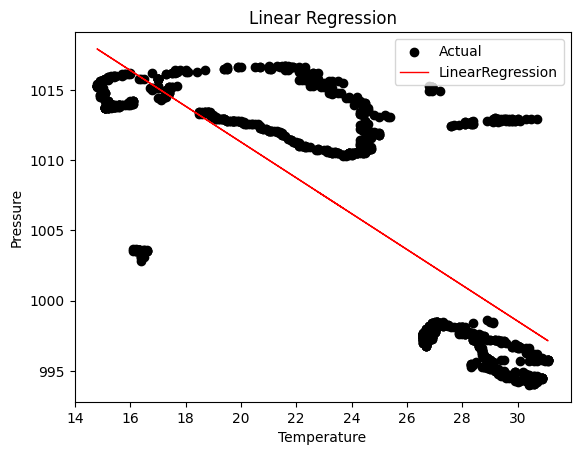

In [54]:
plt.scatter(x_test, y_test, color='black', label='Actual')
plt.plot(x_test, y_linear_pred, color='red', linewidth=1, label='LinearRegression')
plt.title("Linear Regression")
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()


Polynomial Regression Results (Degree 2):
R-Sqaured:  0.621173374258475
mean Squared Error:  26.691508471895496
Mean Absolute Error:  3.7344361623258027


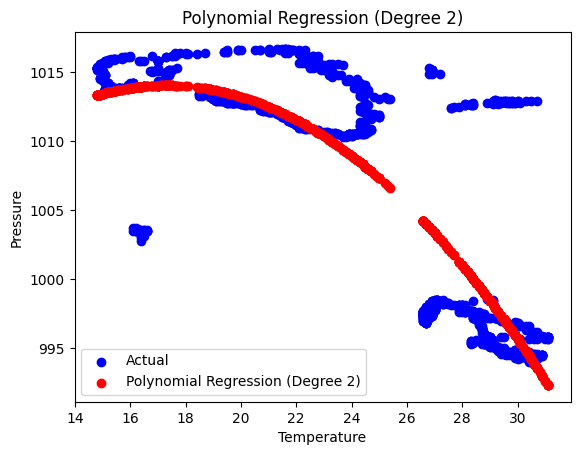


Polynomial Regression Results (Degree 3):
R-Sqaured:  0.641982990270999
mean Squared Error:  25.225296742432324
Mean Absolute Error:  3.744009950870703


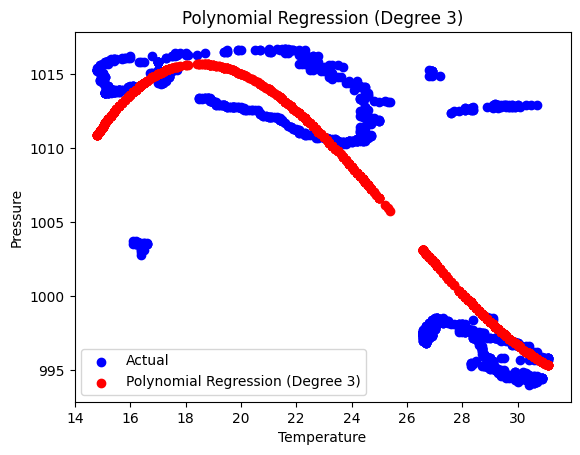


Polynomial Regression Results (Degree 4):
R-Sqaured:  0.6856319995620566
mean Squared Error:  22.14985847564843
Mean Absolute Error:  3.277190018188584


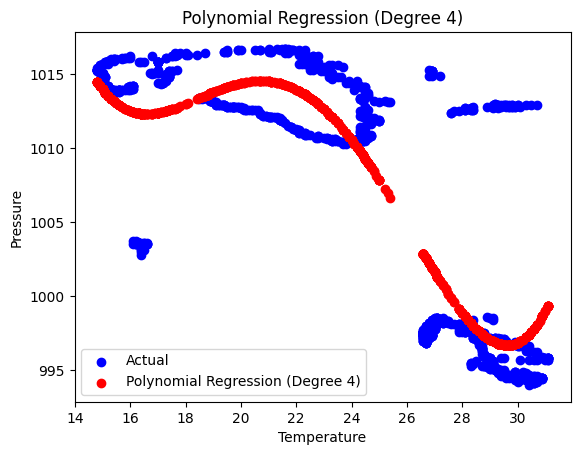


Polynomial Regression Results (Degree 5):
R-Sqaured:  0.7024745676141413
mean Squared Error:  20.9631584991863
Mean Absolute Error:  3.373032965052328


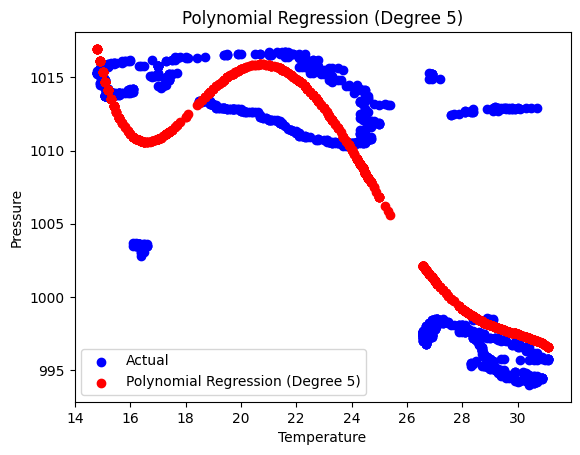


Polynomial Regression Results (Degree 6):
R-Sqaured:  0.7148213041496878
mean Squared Error:  20.09322750583617
Mean Absolute Error:  3.1925575276735643


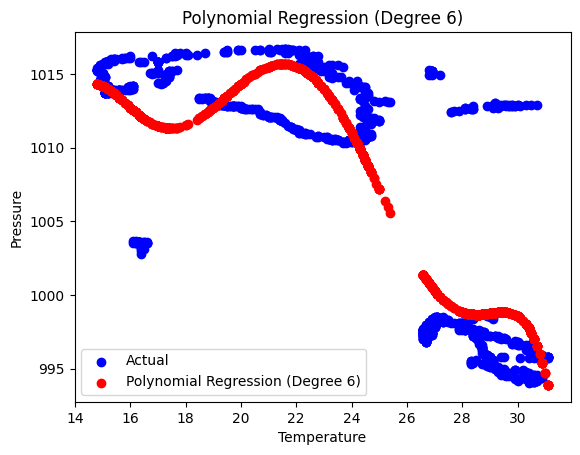


Polynomial Regression Results (Degree 7):
R-Sqaured:  0.7259433828022627
mean Squared Error:  19.309583916901
Mean Absolute Error:  3.1049612013548327


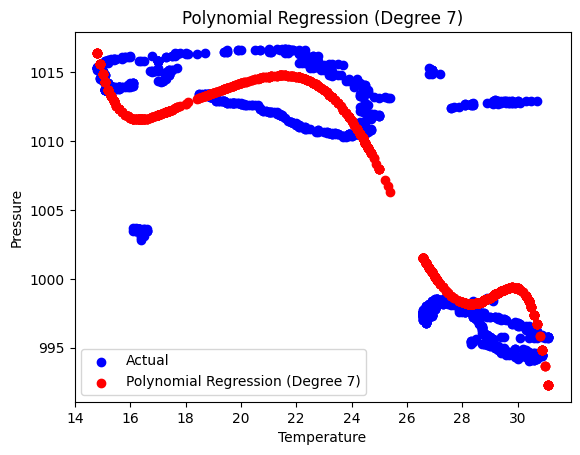

In [56]:
degrees = [2,3,4,5,6,7]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(X_train_reshaped)
    x_poly_test = poly.fit_transform(X_test_reshaped)

    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y_train)
    y_poly_pred = poly_model.predict(x_poly_test)

    poly_r2 = r2_score(y_test, y_poly_pred)
    poly_mse = mean_squared_error(y_test, y_poly_pred)
    poly_mae = mean_absolute_error(y_test, y_poly_pred)

    print(f"\nPolynomial Regression Results (Degree {degree}):")
    print("R-Sqaured: ", poly_r2)
    print("mean Squared Error: ", poly_mse)
    print("Mean Absolute Error: ", poly_mae)
    
    plt.scatter(x_test, y_test, color='blue', label='Actual')
    plt.scatter(x_test, y_poly_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Temperature')
    plt.ylabel('Pressure')
    plt.legend()
    plt.show()